<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">Transforming Categorical Variables </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Linear Regression, KNN, Decision Tree, Logistic Regression, and SVM models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we learned in this course.

After completing this notebook, you will need to upload it to the "Submit Your Work and Review Your Peers" section of the Final Project module.

Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report displaying the accuracy scores.


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

/bin/bash: mamba: command not found


In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## **Import the required libraries**


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Analytics projects/Project 1-Rain prediction in Australia/Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [ ]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [ ]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [ ]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [ ]:
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_sydney_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3271 non-null   object 
 1   MinTemp          3271 non-null   float64
 2   MaxTemp          3271 non-null   float64
 3   Rainfall         3271 non-null   float64
 4   Evaporation      3271 non-null   float64
 5   Sunshine         3271 non-null   float64
 6   WindGustSpeed    3271 non-null   int64  
 7   WindSpeed9am     3271 non-null   int64  
 8   WindSpeed3pm     3271 non-null   int64  
 9   Humidity9am      3271 non-null   int64  
 10  Humidity3pm      3271 non-null   int64  
 11  Pressure9am      3271 non-null   float64
 12  Pressure3pm      3271 non-null   float64
 13  Cloud9am         3271 non-null   int64  
 14  Cloud3pm         3271 non-null   int64  
 15  Temp9am          3271 non-null   float64
 16  Temp3pm          3271 non-null   float64
 17  RainTomorrow  

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [ ]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [ ]:
df_sydney_processed = df_sydney_processed.astype(float)

In [ ]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,random_state=10)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
from sklearn import linear_model
LinearReg = linear_model.LinearRegression()
LinearReg.fit(x_train,y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
predictions_Linear = LinearReg.predict(x_test)

In [ ]:
df_compare=pd.DataFrame({'Predicted':predictions_Linear, 'Actual':y_test})
df_compare

,Predicted,Actual
3066,0.131546,0.0
2456,0.276123,0.0
1629,0.978119,1.0
838,0.287567,1.0
2506,0.132431,0.0
...,...,...
2632,0.264832,1.0
1725,0.175110,0.0
1158,0.706512,1.0
1661,0.173828,0.0


#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean(np.absolute(predictions_Linear-y_test))
LinearRegression_MSE = np.mean((predictions_Linear-y_test)**2)
LinearRegression_R2 = r2_score(y_test,predictions_Linear)

#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
metrics_dict={"LinearRegression_MAE":LinearRegression_MAE,
              "LinearRegression_MSE":LinearRegression_MSE,
              "LinearRegression_R2":LinearRegression_R2}
Report = pd.DataFrame(metrics_dict,index=[0])
print(Report)

   LinearRegression_MAE  LinearRegression_MSE  LinearRegression_R2
0              0.256309              0.115719             0.427138


LinearRegression_MAE: Mean Absolute Error is 0.256309 which means on average the model's prediction is off by 0.256309 units.

LinearRegression_MSE: Mean Squared Error is 0.115719 which is a positive value and indicates the average squared difference between the actual and predicted values of the target variable.

LinearRegression_R2: R-squared is 0.427138 which means the model is able to explain 42.71% of the variance in the data. R-squared ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variance.

### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
from sklearn.model_selection import train_test_split
X = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
Y = df_sydney_processed['RainTomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
 
k = 4
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
predictions_KNN=KNN.predict(X_test)
predictions_KNN[0:5]

array([0., 0., 0., 0., 1.])

In [ ]:
df_compare_KNN=pd.DataFrame({'Predicted':predictions_KNN, 'Actual':y_test})
df_compare_KNN

,Predicted,Actual
229,0.0,0.0
2347,0.0,1.0
1783,0.0,0.0
3030,0.0,0.0
1651,1.0,1.0
...,...,...
1525,0.0,0.0
3,1.0,1.0
2934,0.0,0.0
2177,0.0,0.0


In [ ]:
#We can calculate the accuracy of KNN for different values of k.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    predictions_KNN=KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, predictions_KNN)

    
    std_acc[n-1]=np.std(predictions_KNN==y_test)/np.sqrt(predictions_KNN.shape[0])

mean_acc

array([0.74, 0.76, 0.76, 0.76, 0.75, 0.75, 0.76, 0.76, 0.77])

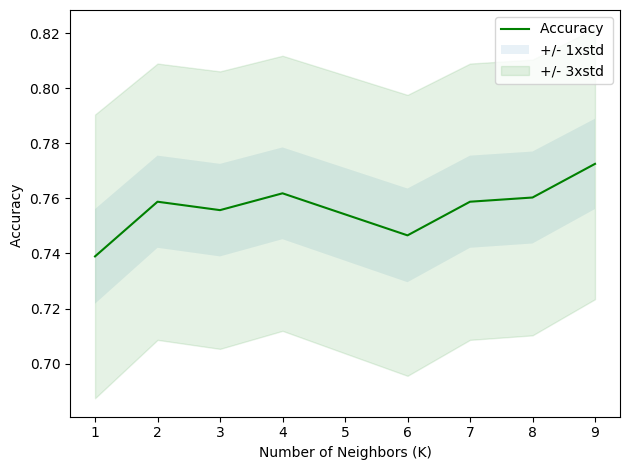

In [ ]:
#Plot the model accuracy for a different number of neighbors.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7725190839694657 with k= 9


#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions_KNN)
KNN_JaccardIndex = jaccard_score(y_test, predictions_KNN)
KNN_F1_Score = f1_score(y_test, predictions_KNN)

print(KNN_Accuracy_Score)
print(KNN_JaccardIndex)
print(KNN_F1_Score)

0.7725190839694657
0.2938388625592417
0.4542124542124542


Based on the values provided, it seems that the performance of a K-Nearest Neighbors (KNN) classifier is moderate.

KNN_Accuracy_Score: The accuracy of the KNN model is 0.7725 which means the model is able to correctly classify 77.25% of the test data.

KNN_JaccardIndex: The Jaccard Index is 0.2938 which measures the similarity between the predicted and actual classes. A Jaccard Index of 1 indicates a perfect match, while a value of 0 indicates no overlap between the predicted and actual classes.

KNN_F1_Score: The F1 score is 0.4542 which is the harmonic mean of precision and recall. F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall.

F1 score is a metric used to evaluate the performance of a classification model. It is the harmonic mean of precision and recall, which are two other common metrics used to evaluate classification models.

Precision is the ratio of true positives (correctly predicted positive instances) to the total number of positive predictions. It measures the proportion of positive predictions that are actually correct.

Recall is the ratio of true positives to the total number of actual positives (positive instances in the ground truth). It measures the proportion of actual positives that are correctly identified by the model.

The F1 score is a balanced measure of both precision and recall, and it is calculated as the harmonic mean of these two metrics:

F1 score = 2 * (precision * recall) / (precision + recall)

F1 score ranges from 0 to 1, where a score of 1 indicates perfect precision and recall, and a score of 0 indicates that either precision or recall is zero. In general, a higher F1 score indicates better performance of the model in terms of both precision and recall.

Therefore, F1 score is a useful metric when the goal is to have both high precision and high recall. However, it may not be the best metric to use in all situations, especially when the distribution of classes is imbalanced or when precision and recall are not equally important. In such cases, other metrics such as precision, recall, or ROC AUC may be more appropriate.


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
predictions_Tree = Tree.predict(X_test)
predictions_Tree[0:5]

array([0., 0., 0., 0., 0.])

In [ ]:
df_compare_Tree=pd.DataFrame({'Predicted':predictions_Tree, 'Actual':y_test})
df_compare_Tree.head(50)

,Predicted,Actual
229,0.0,0.0
2347,0.0,1.0
1783,0.0,0.0
3030,0.0,0.0
1651,0.0,1.0
3012,0.0,0.0
2027,0.0,0.0
2568,0.0,0.0
2465,1.0,1.0
1725,0.0,0.0


#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions_Tree)
Tree_JaccardIndex = jaccard_score(y_test, predictions_Tree)
Tree_F1_Score = f1_score(y_test, predictions_Tree)

print(Tree_Accuracy_Score)
print(Tree_JaccardIndex)
print(Tree_F1_Score)

0.8305343511450382
0.4504950495049505
0.621160409556314


Tree_Accuracy_Score: The accuracy of the Decision Tree model is 0.8305, which means that the model is able to correctly classify 83.05% of the test data.

Tree_JaccardIndex: The Jaccard Index of the Decision Tree model is 0.4505, which indicates that the model is able to predict the positive instances with a moderate level of accuracy.

Tree_F1_Score: The F1 score of the Decision Tree model is 0.6212, which indicates that the model is able to achieve a moderate balance between precision and recall.

### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot
from sklearn.model_selection import train_test_split
X = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
Y = df_sydney_processed['RainTomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Q14) Now, use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
predictions_LR = LR.predict(X_test)

In [ ]:
predictions_LR_prob = LR.predict_proba(X_test)
predictions_LR_prob

array([[0.51, 0.49],
       [0.94, 0.06],
       [0.52, 0.48],
       ...,
       [0.95, 0.05],
       [0.63, 0.37],
       [0.23, 0.77]])

In [ ]:
df_compare_LR=pd.DataFrame({'Predicted':predictions_LR, 'Actual':y_test})
df_compare_LR.tail(5)

,Predicted,Actual
1224,1.0,1.0
756,1.0,0.0
2774,0.0,0.0
1387,0.0,0.0
1723,1.0,0.0


#### Q15) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
LR_Accuracy_Score = accuracy_score(y_test, predictions_LR)
LR_JaccardIndex = jaccard_score(y_test, predictions_LR,pos_label=0)
LR_F1_Score = f1_score(y_test, predictions_LR)
LR_Log_Loss = log_loss(y_test, predictions_LR_prob)

print(LR_Accuracy_Score)
print(LR_JaccardIndex)
print(LR_F1_Score)
print(LR_Log_Loss)

0.8259541984732824
0.7888888888888889
0.6686046511627907
0.38860313858091705


LR_Accuracy_Score: The accuracy of the Logistic Regression model is 0.826, which means that the model is able to correctly classify 82.6% of the test data.

LR_JaccardIndex: The Jaccard Index of the Logistic Regression model is 0.789, which indicates that the model is able to predict the negative instances with a high level of accuracy. Note that we specified pos_label=0, which means that we want to calculate the Jaccard Index for the negative instances.

LR_F1_Score: The F1 score of the Logistic Regression model is 0.669, which indicates that the model is able to achieve a moderate balance between precision and recall.

LR_Log_Loss: The log loss of the Logistic Regression model is 0.389, which measures the performance of the model's probability estimates. A lower log loss indicates better performance, so this value suggests that the model's probability estimates are reasonably good.

Logarithmic Loss, also known as Log Loss, is a measure of how well a classifier predicts probabilities. It is commonly used in evaluating binary classification models, where the goal is to predict one of two classes (e.g., positive or negative).

The log loss measures the difference between the predicted probabilities and the true binary labels, taking into account the uncertainty of the model. It is defined as the negative logarithm of the likelihood function, which is a function that measures how well the model fits the data.

A lower log loss indicates better performance, with a perfect model having a log loss of 0. If the predicted probabilities are close to the true labels, then the log loss will be small. However, if the predicted probabilities are far from the true labels, then the log loss will be large.

In summary, log loss is a measure of how well a binary classification model predicts probabilities. It takes into account the uncertainty of the model and penalizes the model more heavily for confidently predicting the wrong label. A lower log loss indicates better performance, with a perfect model having a log loss of 0.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predictions_LR, labels=[1,0]))

[[115  67]
 [ 47 426]]


Confusion matrix, without normalization
[[115  67]
 [ 47 426]]


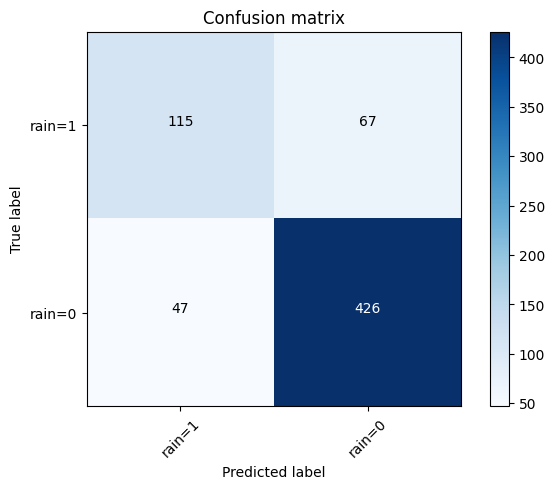

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_LR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['rain=1','rain=0'],normalize= False,  title='Confusion matrix')

In the confusion matrix, the rows represent the actual classes, while the columns represent the predicted classes. The matrix is shown without normalization, meaning that the actual counts of each class are displayed.
The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions made by the logistic regression model on the test set.


There were 115 instances where the model  predicted that it would rain (true positive)

426 instances where the model  predicted that it would not rain (true negative)

67 instances where the model  predicted that it would not rain when it did (false negative)

47 instances where the model predicted that it would rain when it did (false positive).


[TP,FN]

[FP,TN]

In [ ]:
print (classification_report(y_test, predictions_LR))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       473
         1.0       0.71      0.63      0.67       182

    accuracy                           0.83       655
   macro avg       0.79      0.77      0.78       655
weighted avg       0.82      0.83      0.82       655



This is the classification report for logistic regression model. It shows precision, recall and f1-score for each class (1: rainy, 0: not rainy) along with the support (number of samples) in the test set.

For class 1, the precision is 0.71, meaning that out of all samples that the model classified as rainy, 71% were actually rainy. The recall is 0.63, meaning that out of all actual rainy samples, the model correctly identified 63% as rainy. The f1-score is 0.67, which is the harmonic mean of precision and recall.

For class 0, the precision is 0.86, meaning that out of all samples that the model classified as not rainy, 86% were actually not rainy. The recall is 0.90, meaning that out of all actual not rainy samples, the model correctly identified 90% as not rainy. The f1-score is 0.88.

The accuracy of the model is 0.83, meaning that 83% of the samples in the test set were correctly classified by the model. The weighted average of precision, recall, and f1-score is also provided, which takes into account the imbalance in the number of samples between the two classes.

### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=1)
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train) 

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
predictions_SVM = SVM.predict(X_test)

In [ ]:
df_compare_SVM=pd.DataFrame({'Predicted':predictions_SVM, 'Actual':y_test})
df_compare_SVM.head(10)

,Predicted,Actual
255,0.0,0.0
1552,0.0,0.0
1353,0.0,0.0
1060,0.0,0.0
808,0.0,0.0
836,1.0,1.0
2108,0.0,0.0
3005,0.0,0.0
1401,0.0,0.0
602,0.0,0.0


#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions_SVM)
SVM_JaccardIndex = jaccard_score(y_test, predictions_SVM)
SVM_F1_Score = f1_score(y_test, predictions_SVM)

print(SVM_Accuracy_Score)
print(SVM_JaccardIndex)
print(SVM_F1_Score)

0.8290076335877863
0.4666666666666667
0.6363636363636364


The SVM_Accuracy_Score is the accuracy of the SVM classifier on the test data. It is the fraction of the total number of correctly classified instances to the total number of instances in the test data.

The SVM_JaccardIndex is a measure of the similarity between the predicted labels and the true labels. It is defined as the size of the intersection divided by the size of the union of the predicted and true label sets.

The SVM_F1_Score is the harmonic mean of the precision and recall of the SVM classifier. It is a measure of the balance between precision and recall.

In this case, the SVM classifier has an accuracy of 0.829, which means it correctly classified 82.9% of the instances in the test data. 

The Jaccard index of 0.466 indicates a moderate level of similarity between the predicted and true label sets. 

The F1 score of 0.636 suggests that the SVM classifier has a reasonable balance between precision and recall.

### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [ ]:
#Enter Your Code, Execute and take the Screenshot

In [ ]:
Report = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree', 'Logistic Regression','SVM'],
    'Accuracy': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
    'Jaccard Index': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
    'F1-Score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
    'LogLoss': [None, None,LR_Log_Loss, None]
    })

In [ ]:
print(Report)

                 Model  Accuracy  Jaccard Index  F1-Score   LogLoss
0                  KNN  0.772519       0.293839  0.454212       NaN
1        Decision Tree  0.830534       0.450495  0.621160       NaN
2  Logistic Regression  0.825954       0.788889  0.668605  0.388603
3                  SVM  0.829008       0.466667  0.636364       NaN


This is a table that shows the performance of different models on the classification task. Here are the details of the columns:

Model: The name of the model.
Accuracy: The accuracy score of the model, which is the proportion of correctly classified instances over the total number of instances.

Jaccard Index: A measure of similarity between predicted and actual values, calculated as the size of the intersection divided by the size of the union of the predicted and actual sets. It ranges from 0 to 1, with higher values indicating better performance.

F1-Score: The harmonic mean of precision and recall, which takes into account both false positives and false negatives. It ranges from 0 to 1, with higher values indicating better performance.

LogLoss: The logarithmic loss, which measures the performance of a classification model where the predicted output is a probability value between 0 and 1. It ranges from 0 to infinity, with lower values indicating better performance.

Looking at the table, we can see that the Decision Tree model has the highest accuracy and F1-score.

The Logistic Regression model has the highest F1 Score.

The Jaccard Index also suggests that logistic regression has better similarity with the actual values compared to the KNN and SVM models. 

The log-loss of the logistic regression model is also the lowest, indicating better performance compared to the other models.

<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

<a href="https://www.linkedin.com/in/birlahimanshu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Himanshu Birla</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab         |
| 2022-06-22        | 2.0     | Lana K.       | Deleted GridSearch and Mock |
| <hr>              |         |               |                             |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
